In [9]:
# 1.Implement Naïve Bayes method using scikit-learn library
# importing packages

import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import time
import warnings
from sklearn import metrics
# read the csv data into pandas data frame
glass_df = pd.read_csv("glass.csv")

# Splitting the data into training and testing sets
X_train, X_test = train_test_split(glass_df, test_size=0.2, random_state=int(time.time()))

# features columns
features = [
    "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"
]

# Naïve Bayes Classifier initilizing
gauss_clf = GaussianNB()
# train the classifier
gauss_clf.fit(
    X_train[features].values,
    X_train["Type"]
)

# make predictions
y_pred = gauss_clf.predict(X_test[features])
print("Naïve Bayes\nTotal number of points: {}\nMislabeled points : {}\nAccuracy {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Type"] != y_pred).sum(),
          100 * (1 - (X_test["Type"] != y_pred).sum() / X_test.shape[0])
      ))
print("\n")


# Naïve Bayes Classifier performance
print(metrics.classification_report(X_test["Type"], y_pred))



Naïve Bayes
Total number of points: 43
Mislabeled points : 21
Accuracy 51.16%


              precision    recall  f1-score   support

           1       0.57      0.60      0.59        20
           2       0.40      0.18      0.25        11
           3       0.11      1.00      0.20         1
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       1.00      0.75      0.86         8

    accuracy                           0.51        43
   macro avg       0.51      0.59      0.48        43
weighted avg       0.58      0.51      0.52        43



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [10]:
# 2. Implement linear SVM method using scikit-learn
# Linear Support Vector Classification with Linear kernel
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import time
import warnings
from sklearn import metrics
svcLin = SVC(kernel='linear')
# train linear SVM model
svcLin.fit(
    X_train[features].values,
    X_train["Type"]
)
Y_pred = svcLin.predict(X_test[features])


# Linear SVM Model performance
acc_svc = round(svcLin.score(
    X_test[features].values, X_test["Type"]) * 100, 2)
print("Linear SVM accuracy is:", acc_svc)


# Support vector classifier with the radial basis function kernel
svcRbf = SVC(kernel='rbf')
svcRbf.fit(
    X_train[features].values,
    X_train["Type"]
)

# model predictions
Y_pred = svcRbf.predict(X_test[features])


# SVM RBF Model performance
acc_svc = round(svcRbf.score(
    X_test[features].values, X_test["Type"]) * 100, 2)
print("SVM RBF model accuracy is:", acc_svc)
print("\n")
print(metrics.classification_report(X_test["Type"],Y_pred))

Linear SVM accuracy is: 69.77
SVM RBF model accuracy is: 25.58


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.26      1.00      0.41        11
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         8

    accuracy                           0.26        43
   macro avg       0.04      0.17      0.07        43
weighted avg       0.07      0.26      0.10        43



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classificatio

Mean Squared Error: 21026037.329511296


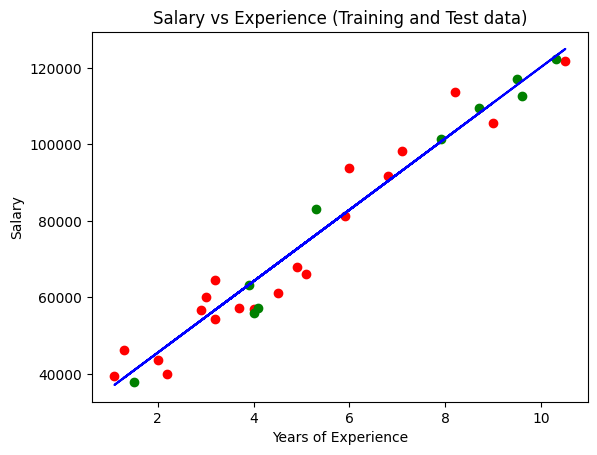

In [12]:
# 3. Implement Linear Regression using scikit-learn
# Simple Linear Regression
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# a. Importing the datasets

data = pd.read_csv("Salary_Data.csv")


X = data[["YearsExperience"]]
Y = data["Salary"]

# b. Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

# c. Fitting Simple Linear Regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# c. Predicting the Test set result
y_pred = regressor.predict(X_test)

# d. Calculate Mean Squared Error
meanSq = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", meanSq)


# e. Visualising the Test set results
plt.scatter(X_train, Y_train, color='red')
plt.scatter(X_test, Y_test, color='green')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training and Test data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()